In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('S02-hw-dataset.csv')

In [3]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [5]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [6]:
for indx in df.keys():
    print(indx,df[df[indx].isna() == 1].index)

user_id Index([], dtype='int64')
age Index([4, 12], dtype='int64')
country Index([], dtype='int64')
purchases Index([], dtype='int64')
revenue Index([], dtype='int64')


In [7]:
df[df.duplicated() == True]

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [8]:
sorted(df['age'])[:3]

[5.0, 18.0, 20.0]

In [9]:
df[(df['age'] < 18) | (df['age'] > 100)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


В данном случае мы видим отклонение по возрасту (в первой строке 120 лет, во второй 5 лет), так же в первой строке видно отклонение по продажам:
купили товаров -1. Во второй строке 5 летний мальчик купил товаров на ??1488?? 

In [10]:
df = df.drop(df[(df['age'] < 18) | (df['age'] > 100)].index)

In [11]:
df[(df['age'] < 18) | (df['age'] > 100)]

,user_id,age,country,purchases,revenue


In [12]:
df[(df['purchases'] < 1)]

,user_id,age,country,purchases,revenue
6,7,46.0,RU,0,0
17,18,24.0,RU,0,0
33,34,28.0,FR,0,0


В данном случае мы проверяем на неадкватное значение количества покупок, но данная несостыковка была решена ранее, вместе с поправками на возраст

In [13]:
df = df.drop(df[(df['purchases'] < 1) & (df['revenue'] > 0)].index)

In [14]:
df[df['revenue'] <= 0]

,user_id,age,country,purchases,revenue
6,7,46.0,RU,0,0
10,11,24.0,US,4,0
17,18,24.0,RU,0,0
33,34,28.0,FR,0,0


Проверка на нулевую или отрицательную прибыл. Здесь видно то, что покупатель приобрел 4 товара, но доход магазина составил 0

In [15]:
df = df.drop(df[(df['purchases'] > 0) & (df['revenue'] <= 0)].index)

In [16]:
df[df['revenue'] <= 0]

,user_id,age,country,purchases,revenue
6,7,46.0,RU,0,0
17,18,24.0,RU,0,0
33,34,28.0,FR,0,0


In [17]:
df = df.drop_duplicates()

In [18]:
df

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511
11,12,20.0,CN,7,1652


In [19]:
df.loc[df['age'].isna(), 'age'] = df['age'].dropna().median()

In [20]:
df

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,34.0,DE,6,1296
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511
11,12,20.0,CN,7,1652


In [21]:
df['cummeam'] = np.round(df.groupby('country')['revenue'].cumsum() / (df.groupby('country')['revenue'].cumcount() + 1))

Добавил оконную функцию для дохода с привязкой к столбцу country

In [22]:
df

,user_id,age,country,purchases,revenue,cummeam
0,1,25.0,FR,7,749,749.0
1,2,24.0,RU,5,1115,1115.0
2,3,52.0,FR,7,399,574.0
3,4,31.0,RU,6,654,884.0
4,5,34.0,DE,6,1296,1296.0
6,7,46.0,RU,0,0,590.0
7,8,28.0,CN,2,456,456.0
8,9,39.0,US,4,980,980.0
9,10,24.0,RU,7,511,570.0
11,12,20.0,CN,7,1652,1054.0


In [23]:
mean_revenue = df.groupby('country')['revenue'].mean()

In [24]:
mean_revenue

country
CN    1054.0
DE    1445.5
FR     666.0
RU     752.0
US     637.0
Name: revenue, dtype: float64

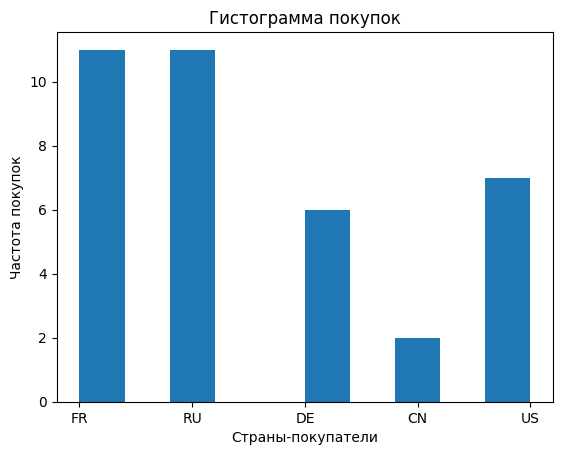

In [25]:
plt.hist(df['country']) 
plt.xlabel("Страны-покупатели")
plt.ylabel("Частота покупок")
plt.title("Гистограмма покупок")
plt.savefig("figures/histogram.jpg")
plt.show()

In [26]:
contry_rev = df.groupby('country')['revenue'].apply(np.array)

In [27]:
contry_rev.values

array([array([ 456, 1652]), array([1296, 2358, 2475,  702, 1104,  738]),
       array([ 749,  399,  693,  183, 1608,  546, 1440,  142,    0,  404, 1162]),
       array([1115,  654,    0,  511,    0,  432,  442,  650, 1302, 1080, 2086]),
       array([980, 630, 904, 330, 828, 445, 342])], dtype=object)

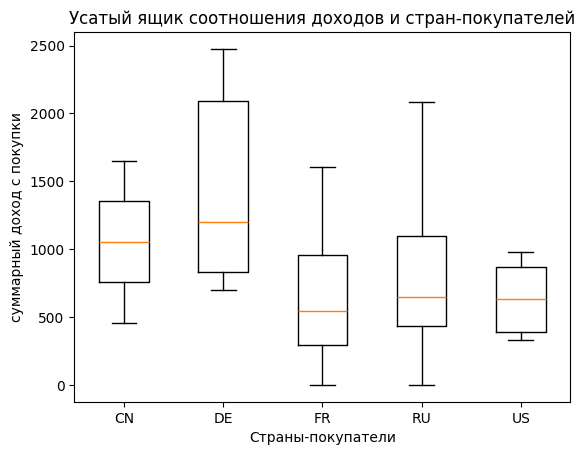

In [28]:
plt.boxplot(contry_rev.to_list())
plt.xticks(range(1, len(contry_rev) + 1), contry_rev.index)
plt.xlabel("Страны-покупатели")
plt.ylabel("суммарный доход с покупки")
plt.title("Усатый ящик соотношения доходов и стран-покупателей")
plt.savefig('figures/boxplot.jpg')

In [29]:
age_revenue = df.groupby('age')['revenue'].mean()

In [30]:
y = np.array(age_revenue.to_list())

In [31]:
X = np.array(age_revenue.index)

In [32]:
X.T

array([18., 20., 21., 22., 23., 24., 25., 26., 28., 31., 32., 33., 34.,
       35., 36., 39., 42., 43., 45., 46., 47., 51., 52., 54., 55., 57.])

In [33]:
y

array([1104.        , 1652.        ,  650.        ,  183.        ,
        445.        ,  542.        ,  749.        , 1080.        ,
        228.        ,  548.        , 2041.5       ,  546.        ,
       1337.33333333,  534.        , 2358.        , 1071.        ,
        904.        ,  828.        ,  404.        ,    0.        ,
        936.        ,  342.        ,  550.5       , 1302.        ,
        142.        ,  693.        ])

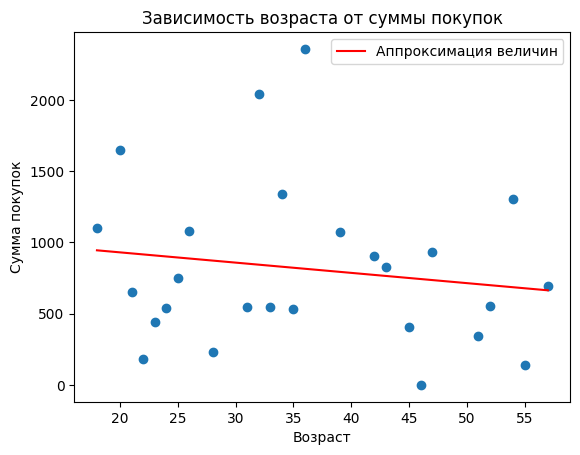

In [34]:
plt.scatter(X, y)
m = 0
for _ in range(50):
    k = np.sum(X @ (y - m)) / np.sum(X ** 2)
    delta = np.sum(k * X + m - y) / len(X)
    m -= delta
x = np.linspace(min(X), max(X))
plt.plot(x, k * x + m, color = 'r', label = "Аппроксимация величин")
plt.xlabel('Возраст')
plt.ylabel("Сумма покупок")
plt.title("Зависимость возраста от суммы покупок")
plt.legend()
plt.savefig('figures/scatter.jpg')
plt.show()